# The machine learning part

It's time to use machine learning to create an algorithm that will automatically recognize the nature of the source of the seismic signal

In [1]:
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

import catalog

catalog.display_parameters()

## Load the features

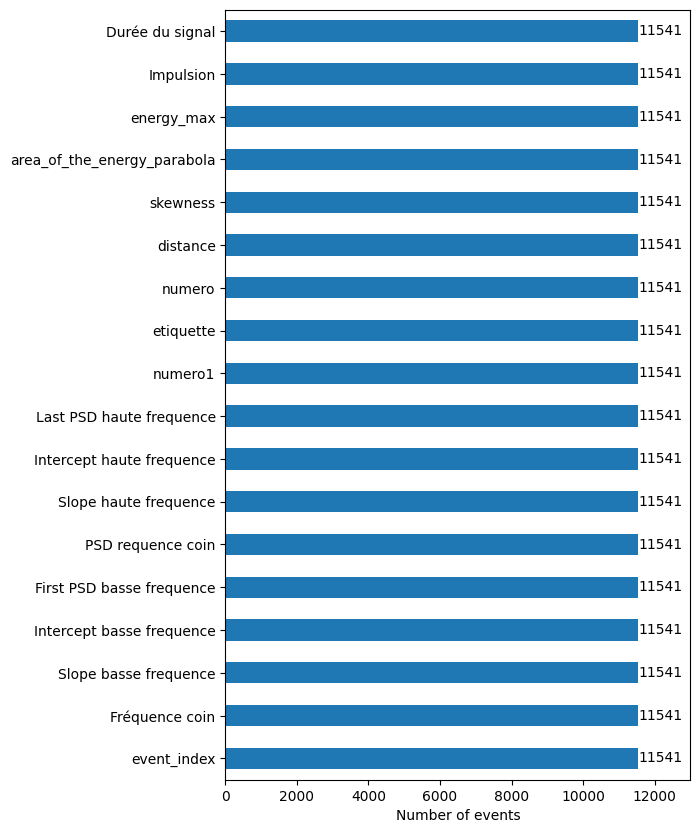

In [2]:
dataframe = catalog.load("features/all_features.pickle")

catalog.open_plot(dataframe, pos_number=0.09, xlim=13000)

## Create the algorithm

### Prepare datas

First, we need to define the data and the label

In [3]:
X = dataframe ## The data (all the features of the events)
y = dataframe["etiquette"] ## The label (the type of the events)

To begin, we will just see if the algorithm can tell whether a seismic signal is produced by an earthquake or an other source.

In [4]:
## In a dictionary, classify events into "earthquake" or "not-earthquake" based on their type
processed_data = {}

for label_index, label in enumerate(dataframe["etiquette"]):
    if label == "earthquake":
        processed_data[label_index] = "earthquake"
    else:
        processed_data[label_index] = "not-earthquake"

## Convert dictionary to pandas series
Y = pd.Series(processed_data)

Remove useless columns and features

In [5]:
useless_columns = ['numero1', 'numero', 'distance', 'event_index', 'Intercept basse frequence', 'Intercept haute frequence', 'PSD requence coin', 'Last PSD haute frequence', 'etiquette']

X = X.drop(columns=useless_columns)

### Divide data

The data will be divide in two sets. The first part will be used for training the algorithm and the second for testing the algorithm.

In [6]:
## We divide the data in 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.7, random_state=0)

### Train the algorithm

Let's use RandomForestClassifier for the algorithm.

In [7]:
## Train 100 decision trees in random forest
model = RandomForestClassifier(n_estimators=100, random_state=0) ## Select the model and the parameters
model.fit(X_train, y_train) ## Train the model with the train set

RandomForestClassifier(random_state=0)

### Test the algorithm

Let's test the algorithm with the test set.

In [8]:
y_pred = model.predict(X_test) ## Use the test set and generate prediction
print(classification_report(y_test, y_pred)) ## Compare prediction with the real label

                precision    recall  f1-score   support

    earthquake       0.81      0.75      0.78      2445
not-earthquake       0.90      0.92      0.91      5634

      accuracy                           0.87      8079
     macro avg       0.85      0.84      0.84      8079
  weighted avg       0.87      0.87      0.87      8079



The model has an accuracy of 87%. This score is quite good but needs to be improved

To improve the accuracy of the model, several solutions can be tested :
- Try other models
- Train the model with more data
- Extract more features

In [9]:
## Save the model
joblib.dump(model, 'data/random_forest_model.pkl')

['data/random_forest_model.pkl']